In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

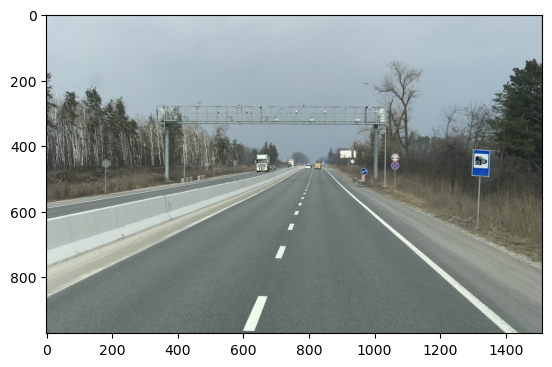

In [10]:
# Load and show the camera frame
img = cv2.imread('C:/Users/user/anaconda3/road.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
plt.imshow(img)
plt.show()

In [51]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Obtain edge map using Canny edge detector with higher thresholds
edges = cv2.Canny(gray, 150, 400)

# We are only interested in the road so we will remove everything above the horizon
edges[0:470] = 0

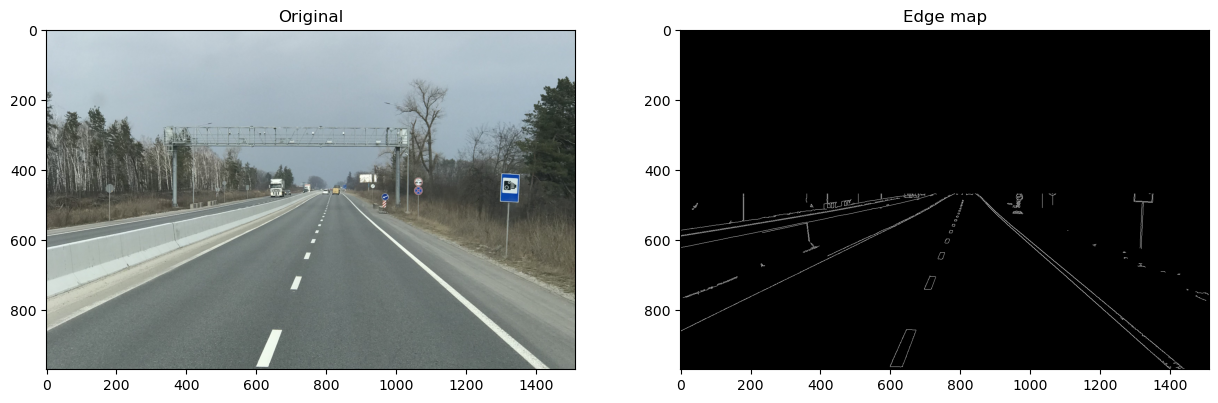

In [52]:
# Let's plot the images
plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.show()

In [56]:
# Apply Hough transform to parametrize the lines
# Hint 1: Offset resolution of 2 pixels and slope resolution of 2 degrees work well in this case
# Hint 2: A suitable value for the accumulator threshold is 190
lines = cv2.HoughLines(edges, 2, np.pi / 90, 190) 

# Let's get rid of the unnecessary dimension
lines = lines[:, 0, :]

In [57]:
# Filter out all lines that are approximately horizontal (+/- 20 degrees). 
filtered_lines = []
for line in lines:
    # Extract theta for current line (remember Hough works with radians)
    theta = line[1]
    # Keep line if theta is not horizontal
    if abs(theta - np.pi/2) > np.deg2rad(20):
        filtered_lines.append(line)

# Let's plot the resulting filtered lines
result = np.copy(img)

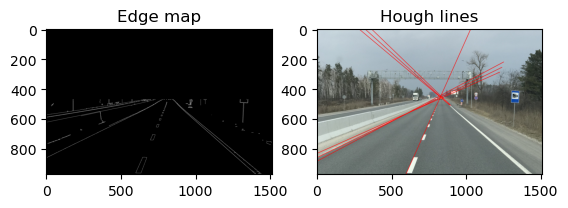

In [58]:
for line in filtered_lines:
    rho = line[0]
    theta = line[1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    
    cv2.line(result, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')
plt.show()

C:\Users\user\anaconda3\envs\cv\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


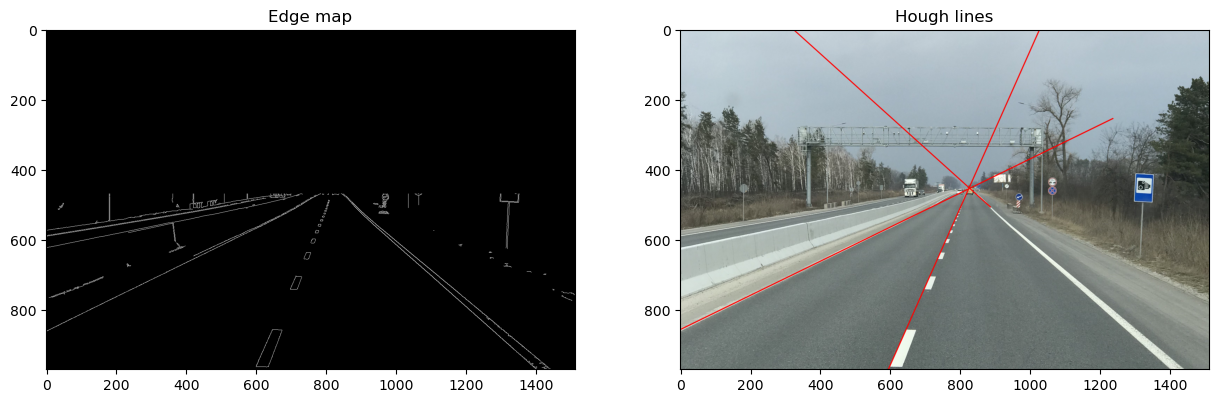

In [59]:

kmeans = KMeans(n_clusters=3).fit(filtered_lines)
cluster_centers = kmeans.cluster_centers_

# Again, let's plot the resulting filtered lines
result = np.copy(img)
    
for line in cluster_centers:
    rho = line[0]
    theta = line[1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    
    cv2.line(result, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)

plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')
plt.show()